In [9]:
!python -m pip install numpy scipy matplotlib

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [15]:
def model(x, a, b, c, d):
    g = lambda t: d*b*np.cos(np.exp(t))/(1+d**2 - np.cos(b*t))
    t = np.linspace(0, x+a, 101)
    int_ = np.trapezoid(g(t), t) + c
    return int_

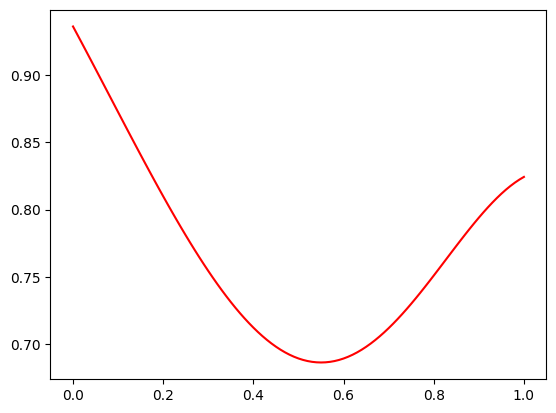

In [19]:
a = 1 
b = 1
c = 1
d = 1
x = np.linspace(0, 1, 101)
y = [model(xi, a, b, c, d) for xi in x] 
plt.plot(x, y, 'r-')

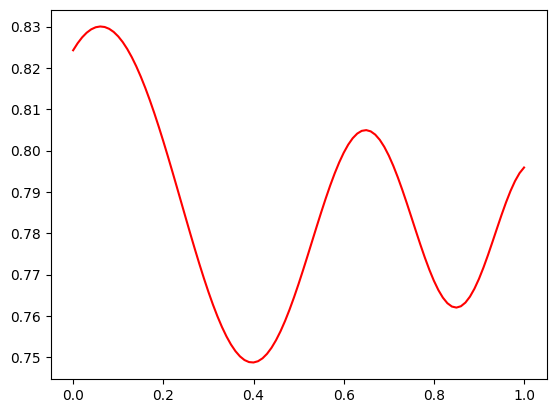

In [18]:
c = 0

a = 2 
b = 1
d = 1
x = np.linspace(0, 1, 101)
y = [model(xi, a, b, c, d) for xi in x] 
plt.plot(x, y, 'r-')

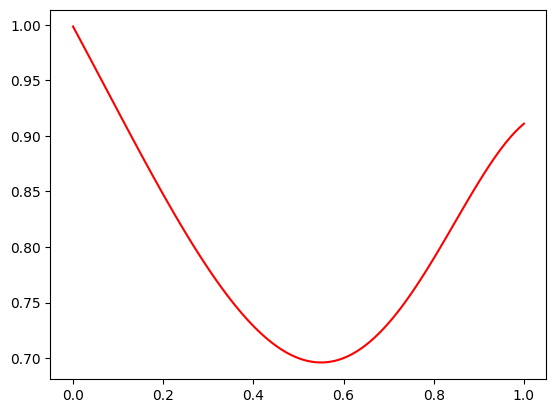

In [20]:
c = 1

a = 1 
b = 2
d = 1
x = np.linspace(0, 1, 101)
y = [model(xi, a, b, c, d) for xi in x] 
plt.plot(x, y, 'r-')

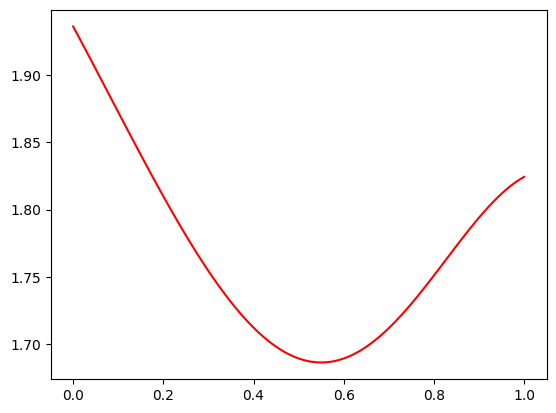

In [22]:
c = 2

a = 1 
b = 1
d = 1
x = np.linspace(0, 1, 101)
y = [model(xi, a, b, c, d) for xi in x] 
plt.plot(x, y, 'r-')

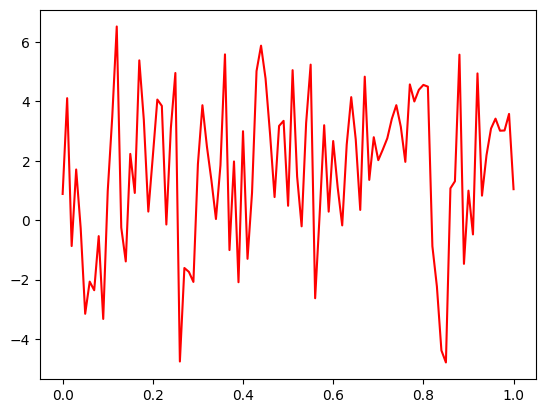

In [28]:
c = 0

a = 10 
b = 50
d = -10
x = np.linspace(0, 1, 101)
y = [model(xi, a, b, c, d) for xi in x] 
plt.plot(x, y, 'r-')

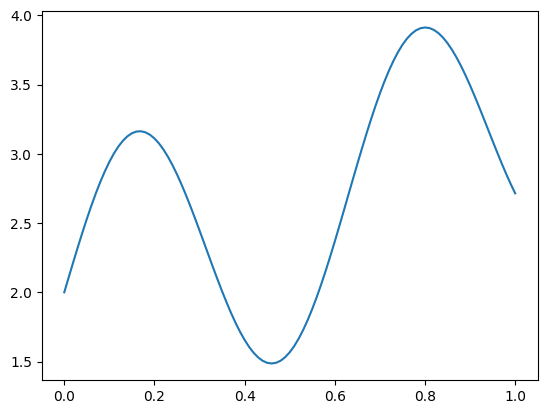

In [35]:
y_an = np.cos(x) + np.sin(10*x)+np.exp(x)
plt.plot(x, y_an)

In [262]:
def J(arg):
    dy = [(model(xi, *arg)-yi_an)**2 for xi, yi_an in zip(x, y_an)]
    return sum(dy)

In [263]:
min_ = J([1.8, 40, 5, 5])
n = 10
args_list = [[a, b, c, d]    for a in np.linspace(1.8-1, 1.8+1, n) 
                             for b in np.linspace(40+10, 40-10, n)
                             for c in np.linspace(5-2, 5+2, n)
                             for d in np.linspace(5-2, 5+2, n)]
for arg in args_list:
    J_ = J(arg)
    if J_ < min_:
        min_ = J_
        arg_rez = arg

print(min_)


29.867924012906105


In [264]:
arg_rez

[np.float64(1.2444444444444445),
 np.float64(30.0),
 np.float64(4.333333333333333),
 np.float64(7.0)]

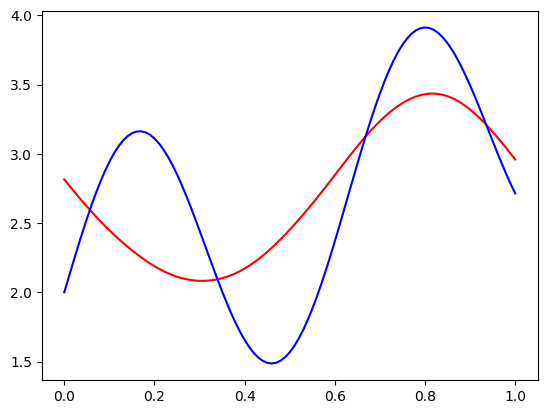

In [265]:
y = [model(xi,*arg_rez) for xi in x] 
plt.plot(x, y, 'r-', x, y_an, 'b')